**Principal Componenet Analysis**<br>
In a nutshell, PCA aims to find the directions of maximum variance in high-dimensional data and projects it onto a new subspace with equal or fewer dimensions that the original one. The orthogonal axes (principal components) of the new subspace can be interpreted as the directions of maximum variance given the constraint that the new feature axes are orthogonal to each other 

As a result of transforming the original d -dimensional data onto this new  k-dimensional subspace (typically k d << ), the first principal component will have the largest possible variance, and all consequent principal components will have the largest possible variance given that they are uncorrelated (orthogonal) to the other principal components. Note that the PCA directions are highly sensitive to data scaling, and we need to standardize the features prior to PCA if the features were measured on different scales and we want to assign equal importance to all features. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import load_wine
data=load_wine()

In [3]:
df_wine=pd.DataFrame(data.data,columns=data.feature_names)
df_wine['Class label']=pd.Series(data.target)
print('Class Labels',np.unique(df_wine['Class label']))
df_wine.columns

Class Labels [0 1 2]


Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'Class label'],
      dtype='object')

In [4]:
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Class label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [5]:
X,y=df_wine.iloc[:,:13].values, df_wine.iloc[:,13].values

In [6]:
print(df_wine.iloc[0].shape)
print(X.shape)

(14,)
(178, 13)


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [9]:
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.fit_transform(X_test)

In [10]:
cov_mat=np.cov(X_train_std.T)
eigen_vals,eigen_vecs=np.linalg.eig(cov_mat)
print(eigen_vals)

[4.8923083  2.46635032 1.42809973 1.01233462 0.84906459 0.60181514
 0.52251546 0.08414846 0.33051429 0.29595018 0.16831254 0.21432212
 0.2399553 ]


Using the numpy.cov function, we computed the covariance matrix of the standardized training dataset. Using the linalg.eig function, we performed the eigendecomposition that yielded a vector (eigen_vals) consisting of 13 eigenvalues and the corresponding eigenvectors stored as columns in a 13 13 × -dimensional  matrix (eigen_vecs). 

Since we want to reduce the dimensionality of our dataset by compressing it onto a new feature subspace, we only select the subset of the eigenvectors (principal components) that contains most of the information (variance). Since the eigenvalues define the magnitude of the eigenvectors, we have to sort the eigenvalues by decreasing magnitude; we are interested in the top k eigenvectors based on the values of their corresponding eigenvalues. But before we collect those k most informative eigenvectors

In [11]:
tot=sum(eigen_vals)
var_exp=[(i/tot) for i in sorted(eigen_vals,reverse=True)]
cum_var_exp=np.cumsum(var_exp)

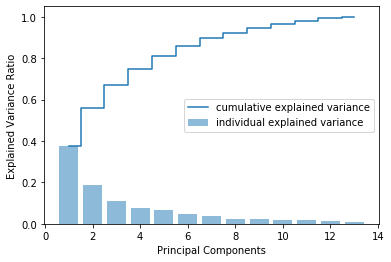

In [37]:
import matplotlib.pyplot as plt
plt.bar(range(1,14),var_exp, alpha=0.5,align='center',label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.show()

The resulting plot indicates that the first principal component alone accounts for 40 percent of the variance. Also, we can see that the first two principal components combined explain almost 60 percent of the variance in the data

In this section, we will sort the eigenpairs  by descending order of the eigenvalues, construct a projection matrix from the selected eigenvectors, and use the projection matrix to transform the data onto  the lower-dimensional subspace. 

In [13]:
eigen_pairs=[(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))]

In [14]:
eigen_pairs.sort(reverse=True)

Next, we collect the two eigenvectors that correspond to the two largest values to capture about 60 percent of the variance in this dataset

In [15]:
W=np.hstack((eigen_pairs[0][1][:, np.newaxis],eigen_pairs[1][1][:,np.newaxis]))

In [16]:
W

array([[ 0.14669811,  0.50417079],
       [-0.24224554,  0.24216889],
       [-0.02993442,  0.28698484],
       [-0.25519002, -0.06468718],
       [ 0.12079772,  0.22995385],
       [ 0.38934455,  0.09363991],
       [ 0.42326486,  0.01088622],
       [-0.30634956,  0.01870216],
       [ 0.30572219,  0.03040352],
       [-0.09869191,  0.54527081],
       [ 0.30032535, -0.27924322],
       [ 0.36821154, -0.174365  ],
       [ 0.29259713,  0.36315461]])

In [17]:
X_train_std[0].dot(W)

array([2.59891628, 0.00484089])

In [18]:
X_train_pca=X_train_std.dot(W)

In [19]:
print(X_train_pca.shape)
p=X_train_pca

(124, 2)


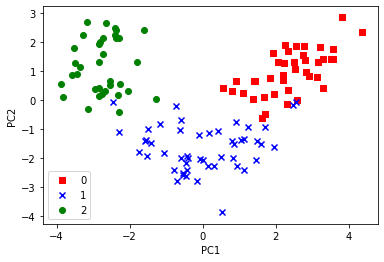

In [21]:
colors=['r','b','g']
markers=['s','x','o']
for l,c,m in zip(np.unique(y_train),colors,markers):
    plt.scatter(X_train_pca[y_train==l,0],
               X_train_pca[y_train==l,1],
               c=c, label=l,marker=m)
    
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

**Principal Component Analysis with scikit-learn decompsition**

In [33]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_train_pca=pca.fit_transform(X_train_std)

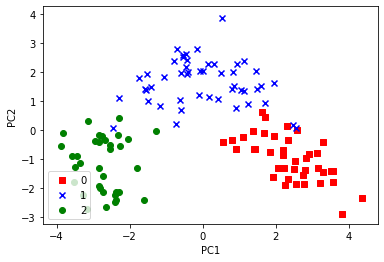

In [34]:
colors=['r','b','g']
markers=['s','x','o']
for l,c,m in zip(np.unique(y_train),colors,markers):
    plt.scatter(X_train_pca[y_train==l,0],
               X_train_pca[y_train==l,1],
               c=c, label=l,marker=m)
    
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

If we compare the PCA projection via scikit-learn with our own PCA implementation, we notice that the plot above is a mirror image of the previous PCA via our step-by-step approach. Note that this is not due to an error in any of those two implementations, but the reason for this difference is that, depending on the eigensolver, eigenvectors can have either negative or positive signs. Not that it matters, but we could simply revert the mirror image by multiplying the data with -1 if we wanted to; note that eigenvectors are typically scaled to unit length 1

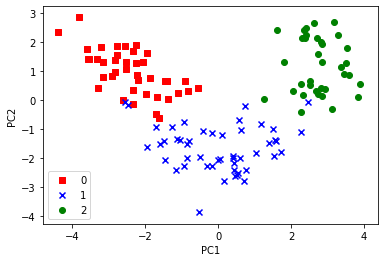

In [35]:
X_train_pca=(-1)*X_train_pca
colors=['r','b','g']
markers=['s','x','o']
for l,c,m in zip(np.unique(y_train),colors,markers):
    plt.scatter(X_train_pca[y_train==l,0],
               X_train_pca[y_train==l,1],
               c=c, label=l,marker=m)
    
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

If we are interested in the explained variance ratios of the different principal components, we can simply initialize the PCA class with the n_components parameter set to None, so all principal components are kept and the explained variance ratio can then be accessed via the explained_variance_ratio_ attribute

In [36]:
pca=PCA(n_components=None)
X_train_pca=pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.37329648, 0.18818926, 0.10896791, 0.07724389, 0.06478595,
       0.04592014, 0.03986936, 0.02521914, 0.02258181, 0.01830924,
       0.01635336, 0.01284271, 0.00642076])